IMPORTAZIONE LIBRERIE

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob
import array 
import scipy.signal as signal
#Processing libraries
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import seaborn as sns
from scipy.stats import zscore
from sklearn.multiclass import OneVsRestClassifier

# Model libraries
from sklearn.linear_model import LogisticRegression, SGDClassifier, Perceptron
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE

# Testing libraries
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, learning_curve
from sklearn.metrics import accuracy_score, log_loss, confusion_matrix, classification_report, roc_curve, auc

# remove warnings
import warnings
warnings.filterwarnings('ignore')

CAMBIO PATH PER ANALISI RISPETTO AL LOG DI VOLO CONSIDERAT

In [2]:
path_file = os.path.abspath(os.getcwd())
print(path_file)
os.chdir(path_file)

c:\Users\chiar\OneDrive\Desktop\MantenzionePreventiva\ProgettoManutenzionePreventiva


ARRAY CHE CONTERRA' I DATAFRAME DI CIASCUN VOLO (PER UN TOTALE DI 18)

In [3]:
data_path = os.path.join(path_file,'*.csv') #lista di tutti gli elementi di estensione csv nella cartella path
csv_list = glob.glob(data_path) #converte data path in un output Unix-like (ls) (*.csv -> lista di elementi con estensione csv)
dataframe_collection = []
df_1 = pd.DataFrame()

# ciclo per scorrere tutti i csv
for csv_file in csv_list: # ciclo che scorre i csv nella cartella path
    df = pd.read_csv(csv_file) 
    #df = df.to_numpy()
    #df = df.to_records(index=False)
    #dataframe_collection.append(df)
    df_1 = df_1.append(df,ignore_index=True)
    #print(df)

# ciclo per scorrere tutti i csv
for csv_file in csv_list: # ciclo che scorre i csv nella cartella path
    df = pd.read_csv(csv_file) 
    #df = df.to_numpy()
    df = df.to_records(index=False)
    dataframe_collection.append(df)

#prova = pd.DataFrame(dataframe_collection)


In [4]:
print(df_1)

      tempo  <>(GyrX)  var(GyrX)  kurt(GyrX)  RMS(GyrX)  freq1(GyrX)  \
0       0.0 -0.032100   0.017081   -0.399284   0.134398         78.0   
1       1.0 -0.032346   0.017054   -0.400010   0.134356        102.0   
2       2.0 -0.032590   0.017026   -0.400594   0.134314         98.0   
3       3.0 -0.032832   0.016999   -0.401113   0.134271        102.0   
4       4.0 -0.033265   0.017017   -0.412325   0.134447        102.0   
...     ...       ...        ...         ...        ...          ...   
1344   62.0 -0.048472   0.006254   -0.082119   0.092673          0.0   
1345   63.0 -0.048289   0.006253   -0.081993   0.092571          0.0   
1346   64.0 -0.048212   0.006240   -0.075446   0.092463          0.0   
1347   65.0 -0.048179   0.006225   -0.068067   0.092367          0.0   
1348   66.0 -0.048194   0.006211   -0.061448   0.092295          0.0   

      freq2(GyrX)  amp1(GyrX)  amp2(GyrX)  <>(GyrY)  ...  amp2(RPM(ESC_5))  \
0            96.0    3.596543    3.414090 -0.014483  ... 

In [5]:
df_1 = df_1.sample(frac=1).reset_index(drop=True)
print(df_1)

      tempo  <>(GyrX)  var(GyrX)  kurt(GyrX)  RMS(GyrX)  freq1(GyrX)  \
0      25.0 -0.135737   0.041930   -1.551014   0.245444         64.0   
1      39.0 -0.121310   0.038619   -0.396377   0.230729         80.0   
2      27.0 -0.041376   0.026616    1.556343   0.168100         78.0   
3      66.0 -0.066194   0.011294    0.545920   0.125094          0.0   
4      22.0 -0.133996   0.041885   -1.549166   0.244392         52.0   
...     ...       ...        ...         ...        ...          ...   
1344   37.0 -0.121180   0.038809   -0.409097   0.231070         76.0   
1345   23.0 -0.026009   0.018209    4.194382   0.137248          0.0   
1346   45.0 -0.043795   0.016495   -0.491676   0.135540        119.0   
1347   88.0 -0.016860   0.017423    3.598658   0.132921          0.0   
1348   34.0 -0.026480   0.009828    2.286030   0.102487         96.0   

      freq2(GyrX)  amp1(GyrX)  amp2(GyrX)  <>(GyrY)  ...  amp2(RPM(ESC_5))  \
0            85.0    4.637692    4.437971  0.027423  ... 

In [6]:
df_1 = df_1.drop(['tempo'], axis=1)
print(df_1)

      <>(GyrX)  var(GyrX)  kurt(GyrX)  RMS(GyrX)  freq1(GyrX)  freq2(GyrX)  \
0    -0.135737   0.041930   -1.551014   0.245444         64.0         85.0   
1    -0.121310   0.038619   -0.396377   0.230729         80.0         57.0   
2    -0.041376   0.026616    1.556343   0.168100         78.0         75.0   
3    -0.066194   0.011294    0.545920   0.125094          0.0        112.0   
4    -0.133996   0.041885   -1.549166   0.244392         52.0         66.0   
...        ...        ...         ...        ...          ...          ...   
1344 -0.121180   0.038809   -0.409097   0.231070         76.0         56.0   
1345 -0.026009   0.018209    4.194382   0.137248          0.0         84.0   
1346 -0.043795   0.016495   -0.491676   0.135540        119.0         98.0   
1347 -0.016860   0.017423    3.598658   0.132921          0.0        116.0   
1348 -0.026480   0.009828    2.286030   0.102487         96.0         69.0   

      amp1(GyrX)  amp2(GyrX)  <>(GyrY)  var(GyrY)  ...  amp2(RP

In [7]:
scale = MinMaxScaler()
df_1[df_1.columns.difference(['Guasto'])] = scale.fit_transform(df_1[df_1.columns.difference(['Guasto'])])
print(df_1)

      <>(GyrX)  var(GyrX)  kurt(GyrX)  RMS(GyrX)  freq1(GyrX)  freq2(GyrX)  \
0     0.033447   0.654536    0.000000   0.985390     0.441379     0.578231   
1     0.116586   0.594451    0.197514   0.899031     0.551724     0.387755   
2     0.577241   0.376638    0.531549   0.531473     0.537931     0.510204   
3     0.434217   0.098594    0.358704   0.279083     0.000000     0.761905   
4     0.043479   0.653712    0.000316   0.979211     0.358621     0.448980   
...        ...        ...         ...        ...          ...          ...   
1344  0.117336   0.597896    0.195338   0.901030     0.524138     0.380952   
1345  0.665800   0.224079    0.982815   0.350407     0.000000     0.571429   
1346  0.563299   0.192967    0.181212   0.340383     0.820690     0.666667   
1347  0.718527   0.209820    0.880910   0.325013     0.000000     0.789116   
1348  0.663086   0.071990    0.656370   0.146407     0.662069     0.469388   

      amp1(GyrX)  amp2(GyrX)  <>(GyrY)  var(GyrY)  ...  amp2(RP

In [8]:
correlated_features = set()
correlation = df_1[df_1.columns[1:]].corr()['Guasto'][:].abs()
correlation = correlation.loc[lambda x : ((x > 0.7) & (x < 1))]
index = correlation.index
print(index)
df_1 = df_1.drop([col for col in df_1.columns if col in index],axis=1)
print(df_1.columns)

Index(['<>(RPM(ESC_5))', 'RMS(RPM(ESC_5))'], dtype='object')
Index(['<>(GyrX)', 'var(GyrX)', 'kurt(GyrX)', 'RMS(GyrX)', 'freq1(GyrX)',
       'freq2(GyrX)', 'amp1(GyrX)', 'amp2(GyrX)', '<>(GyrY)', 'var(GyrY)',
       ...
       'amp2(RPM(ESC_5))', '<>(Curr(ESC_5))', 'var(Curr(ESC_5))',
       'kurt(Curr(ESC_5))', 'RMS(Curr(ESC_5))', 'freq1(Curr(ESC_5))',
       'freq2(Curr(ESC_5))', 'amp1(Curr(ESC_5))', 'amp2(Curr(ESC_5))',
       'Guasto'],
      dtype='object', length=167)


In [9]:
index_list = [340]
df_test = df_1.query('index in @index_list')
#df_test = pd.DataFrame(df_test)
print(df_test)

     <>(GyrX)  var(GyrX)  kurt(GyrX)  RMS(GyrX)  freq1(GyrX)  freq2(GyrX)  \
340  0.437957   0.100423    0.354966   0.279426          0.0      0.55102   

     amp1(GyrX)  amp2(GyrX)  <>(GyrY)  var(GyrY)  ...  amp2(RPM(ESC_5))  \
340      0.3035     0.28888  0.547374   0.087091  ...          0.497155   

     <>(Curr(ESC_5))  var(Curr(ESC_5))  kurt(Curr(ESC_5))  RMS(Curr(ESC_5))  \
340         0.333328          0.902008           0.457837           0.38667   

     freq1(Curr(ESC_5))  freq2(Curr(ESC_5))  amp1(Curr(ESC_5))  \
340            0.836207            0.836207           0.234114   

     amp2(Curr(ESC_5))  Guasto  
340           0.352177       0  

[1 rows x 167 columns]


In [10]:
# Drop values to avoid multicolinearity
df_test = df_test.drop(['Guasto'], axis=1)

In [11]:
#df_1 = df_1.drop([df_1.index[1330], df_1.index[1331]])
df_1 = df_1.drop([df_1.index[340]])
print(df_1)

      <>(GyrX)  var(GyrX)  kurt(GyrX)  RMS(GyrX)  freq1(GyrX)  freq2(GyrX)  \
0     0.033447   0.654536    0.000000   0.985390     0.441379     0.578231   
1     0.116586   0.594451    0.197514   0.899031     0.551724     0.387755   
2     0.577241   0.376638    0.531549   0.531473     0.537931     0.510204   
3     0.434217   0.098594    0.358704   0.279083     0.000000     0.761905   
4     0.043479   0.653712    0.000316   0.979211     0.358621     0.448980   
...        ...        ...         ...        ...          ...          ...   
1344  0.117336   0.597896    0.195338   0.901030     0.524138     0.380952   
1345  0.665800   0.224079    0.982815   0.350407     0.000000     0.571429   
1346  0.563299   0.192967    0.181212   0.340383     0.820690     0.666667   
1347  0.718527   0.209820    0.880910   0.325013     0.000000     0.789116   
1348  0.663086   0.071990    0.656370   0.146407     0.662069     0.469388   

      amp1(GyrX)  amp2(GyrX)  <>(GyrY)  var(GyrY)  ...  amp2(RP

### Bilanciamento del dataset

In [12]:
x = df_1.iloc[:,:-1]
y = df_1.iloc[:,-1:]

In [13]:
oversample = SMOTE()
x, y = oversample.fit_resample(x,y)
print(x)

      <>(GyrX)  var(GyrX)  kurt(GyrX)  RMS(GyrX)  freq1(GyrX)  freq2(GyrX)  \
0     0.033447   0.654536    0.000000   0.985390     0.441379     0.578231   
1     0.116586   0.594451    0.197514   0.899031     0.551724     0.387755   
2     0.577241   0.376638    0.531549   0.531473     0.537931     0.510204   
3     0.434217   0.098594    0.358704   0.279083     0.000000     0.761905   
4     0.043479   0.653712    0.000316   0.979211     0.358621     0.448980   
...        ...        ...         ...        ...          ...          ...   
1618  0.725959   0.006969    0.206541   0.017011     0.493225     0.633987   
1619  0.872633   0.031370    0.186131   0.058777     0.542573     0.436559   
1620  0.115292   0.569241    0.212071   0.882045     0.561148     0.409979   
1621  0.050179   0.652885    0.000536   0.974927     0.442180     0.570244   
1622  0.140479   0.616416    0.185705   0.901751     0.405218     0.546546   

      amp1(GyrX)  amp2(GyrX)  <>(GyrY)  var(GyrY)  ...  amp1(RP

# Selezione feature più importanti

In [14]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif, f_classif, f_regression
fvalue_Best = SelectKBest(score_func=f_regression, k=40)
fit = fvalue_Best.fit(x, y)
print(fit)
print(fvalue_Best.get_support())

SelectKBest(k=40, score_func=<function f_regression at 0x000001DF0A0DD120>)
[ True False False False  True False False False  True  True False  True
  True False  True  True False  True  True  True False False  True False
 False False False False  True False  True False  True False  True False
 False False False False False False False False False False False False
 False False False False False False False False False  True False  True
 False False  True False False False False False False False False False
 False False False False  True  True  True False  True  True False  True
 False False False False False False False False  True  True False False
 False  True False False False False False  True  True False False  True
 False False False False False  True False False False False False False
 False False False False  True  True False False False False False False
 False False False False False False  True False False False False False
 False False False False False False False False

In [15]:
features_score = pd.DataFrame(fit.scores_)
features_score = zscore(features_score)
features = pd.DataFrame(x.columns)
feature_score = pd.concat([features,features_score],axis=1)
# Assigning column names
feature_score.columns = ["Input_Features","F_Score"]
print(feature_score.nlargest(60,columns="F_Score"))

        Input_Features   F_Score
34          kurt(AccY)  5.241782
28         freq1(AccX)  3.473957
12         freq1(GyrY)  3.059451
11           RMS(GyrY)  2.851957
9            var(GyrY)  2.677208
153   kurt(RPM(ESC_5))  2.626013
93   freq2(RPM(ESC_1))  2.612653
92   freq1(RPM(ESC_1))  2.596888
14          amp1(GyrY)  2.489856
159   var(Curr(ESC_5))  2.333263
104     <>(RPM(ESC_2))  1.961097
78    amp1(RPM(ESC_0))  1.818343
152    var(RPM(ESC_5))  1.765637
8             <>(GyrY)  1.757463
107    RMS(RPM(ESC_2))  1.669719
22          amp1(GyrZ)  1.553563
32            <>(AccY)  1.432154
62         amp1(Pitch)  1.287918
76   freq1(RPM(ESC_0))  1.127612
30          amp1(AccX)  1.106051
80     <>(Curr(ESC_0))  1.035948
17           var(GyrZ)  1.022325
77   freq2(RPM(ESC_0))  0.999566
4          freq1(GyrX)  0.927721
57          var(Pitch)  0.910256
19           RMS(GyrZ)  0.888500
81    var(Curr(ESC_0))  0.726820
97    var(Curr(ESC_1))  0.686516
156   amp1(RPM(ESC_5))  0.682464
83    RMS(

In [16]:
i=0
index_false=[]
for el in list(fvalue_Best.get_support()):
    if not el:
        index_false.append(i)
    i=i+1
print(index_false)

[1, 2, 3, 5, 6, 7, 10, 13, 16, 20, 21, 23, 24, 25, 26, 27, 29, 31, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 58, 60, 61, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 79, 82, 84, 85, 86, 87, 88, 89, 90, 91, 94, 95, 96, 98, 99, 100, 101, 102, 105, 106, 108, 109, 110, 111, 112, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 154, 155, 157, 160, 161, 162, 163, 164, 165]


In [17]:
x=x.drop(x.columns[index_false],axis = 1)
print(x)

      <>(GyrX)  freq1(GyrX)  <>(GyrY)  var(GyrY)  RMS(GyrY)  freq1(GyrY)  \
0     0.033447     0.441379  0.669224   0.161890   0.282729     0.689394   
1     0.116586     0.551724  0.785523   0.194181   0.350603     0.750000   
2     0.577241     0.537931  0.342088   0.159526   0.258456     0.000000   
3     0.434217     0.000000  0.540362   0.087579   0.158342     0.984848   
4     0.043479     0.358621  0.664661   0.162839   0.282942     0.651515   
...        ...          ...       ...        ...        ...          ...   
1618  0.725959     0.493225  0.801029   0.263477   0.429291     0.813576   
1619  0.872633     0.542573  0.619968   0.066026   0.137625     0.712157   
1620  0.115292     0.561148  0.758712   0.191148   0.339641     0.795455   
1621  0.050179     0.442180  0.661433   0.163374   0.282934     0.664469   
1622  0.140479     0.405218  0.820633   0.194521   0.361568     0.728569   

      amp1(GyrY)  amp2(GyrY)  var(GyrZ)  kurt(GyrZ)  ...  RMS(RPM(ESC_2))  \
0       0.

In [18]:
df_test=df_test.drop(df_test.columns[index_false],axis = 1)
print(df_test)

     <>(GyrX)  freq1(GyrX)  <>(GyrY)  var(GyrY)  RMS(GyrY)  freq1(GyrY)  \
340  0.437957          0.0  0.547374   0.087091   0.158435     0.848485   

     amp1(GyrY)  amp2(GyrY)  var(GyrZ)  kurt(GyrZ)  ...  RMS(RPM(ESC_2))  \
340    0.140153    0.199718   0.019282     0.15988  ...          0.26802   

     var(Curr(ESC_2))  freq1(RPM(ESC_3))  freq2(RPM(ESC_3))  kurt(RPM(ESC_4))  \
340          0.407362           0.186992           0.190083          0.254457   

     var(RPM(ESC_5))  kurt(RPM(ESC_5))  amp1(RPM(ESC_5))  <>(Curr(ESC_5))  \
340         0.540159          0.233471          0.225763         0.333328   

     var(Curr(ESC_5))  
340          0.902008  

[1 rows x 40 columns]


In [19]:
correlated_features = set()
correlation_matrix = x.corr()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if (correlation_matrix.iloc[i, j] > 0.8) | (correlation_matrix.iloc[i, j] < -0.5):
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

x = x.drop([col for col in x.columns if col in correlated_features],axis=1)
print(x)

      <>(GyrX)  freq1(GyrX)  <>(GyrY)  var(GyrZ)  kurt(GyrZ)  RMS(GyrZ)  \
0     0.033447     0.441379  0.669224   0.039609    0.259117   0.356440   
1     0.116586     0.551724  0.785523   0.023896    0.169083   0.151724   
2     0.577241     0.537931  0.342088   0.070252    0.173388   0.415846   
3     0.434217     0.000000  0.540362   0.018602    0.158305   0.105045   
4     0.043479     0.358621  0.664661   0.039935    0.265214   0.359770   
...        ...          ...       ...        ...         ...        ...   
1618  0.725959     0.493225  0.801029   0.096617    0.097192   0.348986   
1619  0.872633     0.542573  0.619968   0.048269    0.270569   0.430343   
1620  0.115292     0.561148  0.758712   0.034008    0.173275   0.134329   
1621  0.050179     0.442180  0.661433   0.040316    0.266407   0.361602   
1622  0.140479     0.405218  0.820633   0.020403    0.224029   0.171381   

      amp1(GyrZ)  var(Curr(ESC_1))  amp2(Curr(ESC_1))  <>(RPM(ESC_2))  \
0       0.004641          

In [20]:
df_test=df_test.drop([col for col in df_test.columns if col in correlated_features],axis=1)
print(df_test)

     <>(GyrX)  freq1(GyrX)  <>(GyrY)  var(GyrZ)  kurt(GyrZ)  RMS(GyrZ)  \
340  0.437957          0.0  0.547374   0.019282     0.15988   0.109685   

     amp1(GyrZ)  var(Curr(ESC_1))  amp2(Curr(ESC_1))  <>(RPM(ESC_2))  \
340    0.391009           0.08194           0.095589        0.341601   

     var(Curr(ESC_2))  kurt(RPM(ESC_4))  
340          0.407362          0.254457  


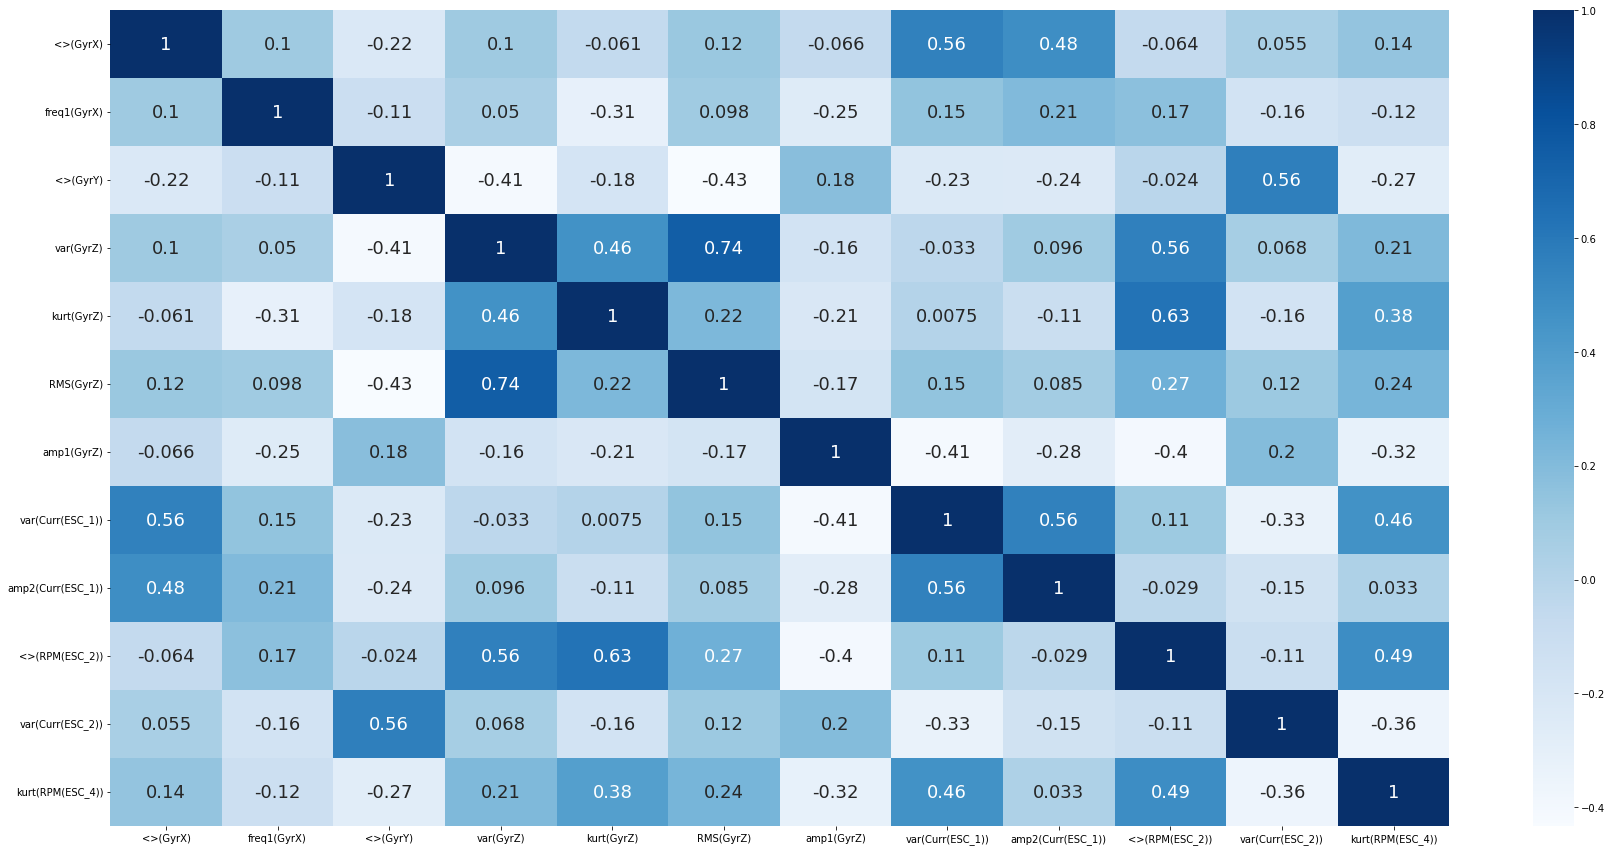

In [21]:
plt.figure(figsize=(30,15))
ax = sns.heatmap(x[x.columns].corr(),cmap="Blues",annot=True,annot_kws={"size": 18})

### Separazione del dataset in training e test

In [22]:
# Random state
rs = 42

# Split the data to check which algorithms learn better (later on we can check )
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=rs)
y_train = y_train.astype(int)
y_test = y_test.astype(int)

# look at the shape of the data (many problems can arise from wrong shape)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1298, 12)
(325, 12)
(1298, 1)
(325, 1)


In [26]:
from sklearn.calibration import CalibratedClassifierCV

# List of classifiers:
classifiers = [
    LogisticRegression(random_state = rs),
    DecisionTreeClassifier(random_state=rs),
    RandomForestClassifier(n_estimators = 10, random_state=rs),
    GradientBoostingClassifier(random_state= rs),
    AdaBoostClassifier(n_estimators=10, random_state= rs),
    LinearDiscriminantAnalysis(),
    SVC(probability=True),
    MLPClassifier(random_state=rs), # Multi Layer Perceptron
    SGDClassifier(random_state=rs) # Stochastic Gradient Descent 
]

# List of results that will occure:
clf_name = [] # names of the classifiers
model_results = pd.DataFrame.copy(y_test) #resulting of prediction from the models

kfold = StratifiedKFold(n_splits=5) #cross-validation
cv_results = [] # scores from cross validation
cv_acc = [] # mean accuracy from cross validation, need to maximize
cv_std = [] # standard deviation from cross validation, need to minimise

cnfm = [] #confusion matrix
clr = [] #classification report
roc_auc = [] #roc curve:
roc_tpr = []
roc_fpr = []

### Classificazione

In [27]:
# Training the algorithms and results
for clf in classifiers:
    name = clf.__class__.__name__
    clf_name.append(name)
    
    #fitting and predictions
    model = clf.fit(x_train, y_train.values.ravel())
    y_pred = model.predict(x_test)
    model_results[name] = y_pred
    
    #accuracy and log loss
    cv_results.append(cross_val_score(clf, x_train, y_train.values.ravel(), scoring = "accuracy",cv = kfold)) # qui invece abbiamo cross validation
    acc = round(accuracy_score(y_test.values.ravel(), y_pred), 2) # accuratezza semplice con training e test
    train_pred = clf.predict(x_test)
    print(f'Cross-Validation: {cross_val_score(clf, x_train, y_train.values.ravel(), scoring = "accuracy",cv = kfold)}') 
    
    print(f'Accuracy: {acc} \t ---> {name} ')

    guasto_pred = pd.Series(model.predict(df_test), name='Guasto_test')
    conteggio = guasto_pred.value_counts()
    print(f'Test: {conteggio}')

    print("----------------------------------------------------")
    
    
    #confusion matrix, clasification report, roc curve
    cnfm.append(confusion_matrix(y_test.values.ravel(), y_pred))
    clr.append(classification_report(y_test.values.ravel(), y_pred))
    fpr, tpr, thresholds = roc_curve(y_pred, y_test.values.ravel(), pos_label=1)
    roc_auc.append(auc(fpr, tpr))
    roc_tpr.append(tpr)
    roc_fpr.append(fpr)
    
    i += 1

for i in cv_results:
    cv_acc.append(i.mean())
    cv_std.append(i.std())


Cross-Validation: [1.         0.99615385 1.         0.996139   1.        ]
Accuracy: 1.0 	 ---> LogisticRegression 
Test: 0    1
Name: Guasto_test, dtype: int64
----------------------------------------------------
Cross-Validation: [1.       1.       1.       1.       0.996139]
Accuracy: 1.0 	 ---> DecisionTreeClassifier 
Test: 0    1
Name: Guasto_test, dtype: int64
----------------------------------------------------
Cross-Validation: [1. 1. 1. 1. 1.]
Accuracy: 1.0 	 ---> RandomForestClassifier 
Test: 0    1
Name: Guasto_test, dtype: int64
----------------------------------------------------
Cross-Validation: [1.         1.         1.         0.996139   0.99227799]
Accuracy: 1.0 	 ---> GradientBoostingClassifier 
Test: 0    1
Name: Guasto_test, dtype: int64
----------------------------------------------------
Cross-Validation: [0.99615385 1.         1.         1.         0.996139  ]
Accuracy: 1.0 	 ---> AdaBoostClassifier 
Test: 0    1
Name: Guasto_test, dtype: int64
-----------------

### Matrici di confusione

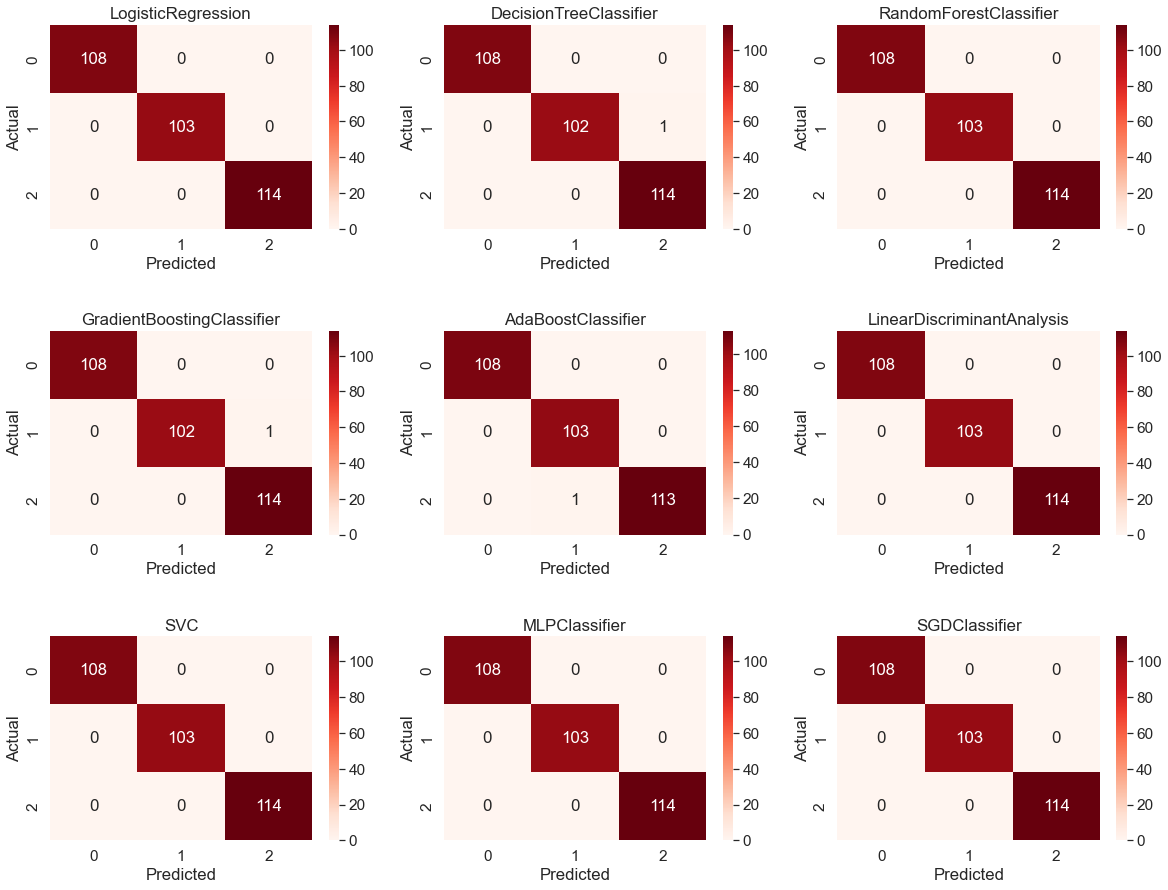

In [28]:
import seaborn as sns
# Confusion matrixes (not-normalized confusion matrix)
plt.figure(figsize=(20,15))
sns.set(font_scale=1.4)
for i in range(len(classifiers)):
    plt.subplot(3,3,i+1) #adjust this acourding to the number of algorithms
    sns.heatmap(cnfm[i], annot=True, fmt="d",cmap="Reds")
    plt.subplots_adjust(hspace = 0.5)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(clf_name[i])

Cross Validation Scores

Text(0.5, 1.0, 'Cross validation scores')

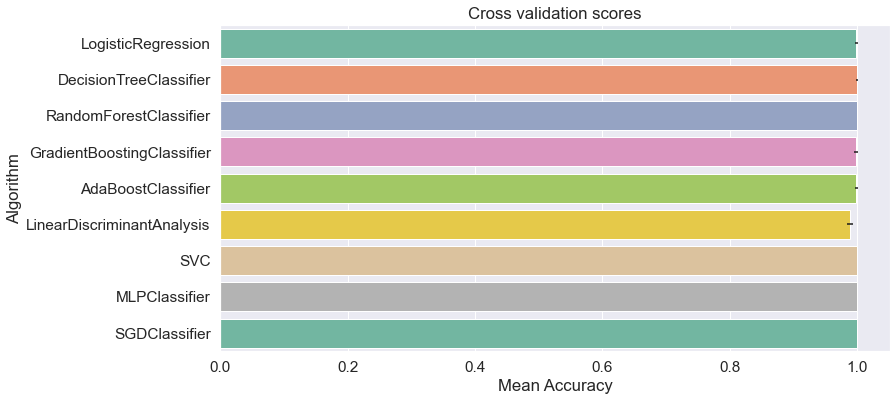

In [29]:
# Cross validation accuracy results graph
cv_res = pd.DataFrame({"CrossValMeans":cv_acc, "CrossValerrors": cv_std,"Algorithm":clf_name})

plt.figure(figsize=(12,6))
sns.barplot(x="CrossValMeans",y="Algorithm",data = cv_res, palette="Set2",orient = "h",**{'xerr':cv_std})
plt.xlabel("Mean Accuracy")
plt.title("Cross validation scores")

Report Classificazione

In [30]:
#Classification reports
for i in range(len(classifiers)):
    print (f"{clf_name[i]} Classification Report:" )
    print (clr[i])

LogisticRegression Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       108
           1       1.00      1.00      1.00       103
           2       1.00      1.00      1.00       114

    accuracy                           1.00       325
   macro avg       1.00      1.00      1.00       325
weighted avg       1.00      1.00      1.00       325

DecisionTreeClassifier Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       108
           1       1.00      0.99      1.00       103
           2       0.99      1.00      1.00       114

    accuracy                           1.00       325
   macro avg       1.00      1.00      1.00       325
weighted avg       1.00      1.00      1.00       325

RandomForestClassifier Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      